In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [54]:
df=pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [55]:
x_train,x_test,y_train,y_test=train_test_split(df[["Age","Fare"]],df["Survived"],test_size=0.2,random_state=1)

In [56]:
imputer=SimpleImputer(strategy="mean")
x_train=pd.DataFrame(imputer.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(imputer.transform(x_test),columns=x_test.columns)

## Checking if data is normal or not

- distributions like histogram,boxplot

<AxesSubplot:xlabel='Age', ylabel='Count'>

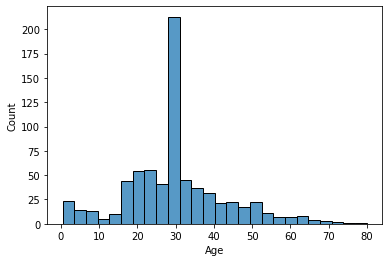

In [58]:
sns.histplot(data=x_train,x="Age")

<AxesSubplot:xlabel='Age'>

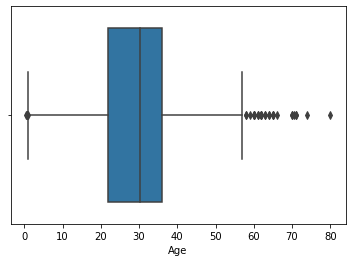

In [59]:
sns.boxplot(data=x_train,x="Age")

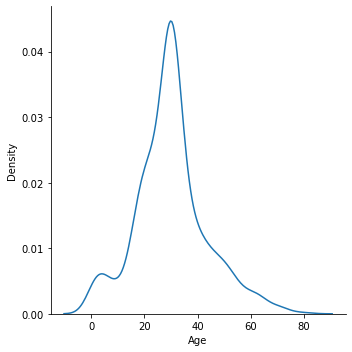

In [60]:
sns.displot(data=x_train,x='Age',kind="kde")

In [ ]:
#from visualy inspecting we can see it is right skewed so not normal

- from skewness and kurtosis

In [62]:
#skewness is positive so right skewed
x_train["Age"].skew()

0.43483760572547375

In [63]:
#this is not pearson formula so here 0 means normal. so positive means peaked
x_train["Age"].kurtosis()

0.9256387898865306

- from hypothesis test- shapiro wilk test

In [65]:
from scipy.stats import shapiro

In [66]:
shapiro(x_train)

ShapiroResult(statistic=0.5913230180740356, pvalue=0.0)

In [67]:
#since pvalue is less than 0.05:it is not normal

- from QQ plot

In [69]:
import scipy.stats as s

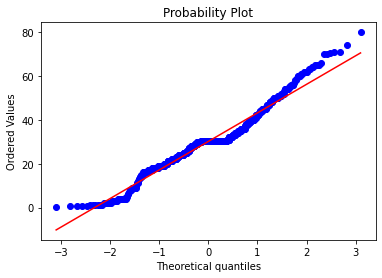

In [73]:
s.probplot(x_train["Age"],plot=plt)
plt.show()

In [74]:
#from this we can see data are not on the straight line , so not normal